In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, factorial

In [2]:
derivadas = [lambda x: -sin(x), lambda x: -cos(x), lambda x: sin(x), lambda x: cos(x)]

def taylor(ordem, x, delta, val):
    for n in range(0, ordem):
        val += derivadas[n % len(derivadas)](x) * (delta ** (n + 1)) / factorial(n + 1)
    return val

def erroVerdadeiro(valorVerdadeiro, valorAproximado):
    return valorVerdadeiro - valorAproximado

def erroRelativoPercentualVerdadeiro(valorVerdadeiro, valorAproximado):
    return abs(round(erroVerdadeiro(valorVerdadeiro, valorAproximado) / valorVerdadeiro * 100, 3))

In [3]:
x0 = float(input("Qual o valor inicial de x? "))
x1 = float(input("Qual o valor final de x? "))
ordem = int(input("Qual o grau do polinômio de Taylor? "))
delta = x1 - x0

x_vals = np.linspace(x0 - 2, x1 + 2, 100)
cos_vals = np.cos(x_vals)
taylor_vals = [taylor(ordem, x0, x - x0, cos(x0)) for x in x_vals]
val = taylor(ordem, x0, delta, cos(x0))

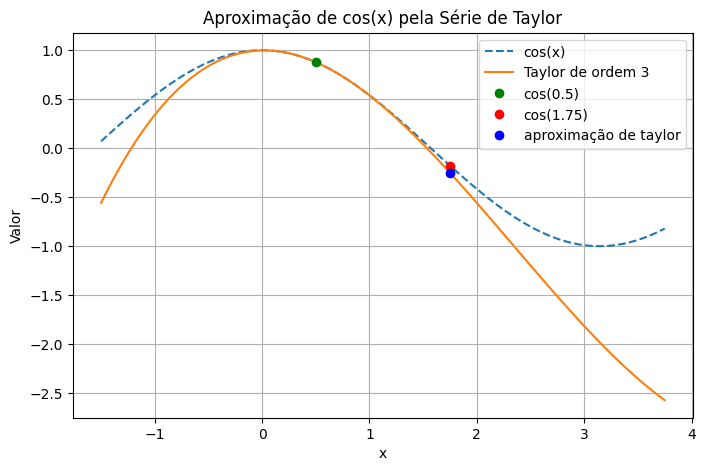

In [4]:
plt.figure(figsize=(8, 5))
plt.plot(x_vals, cos_vals, label='cos(x)', linestyle='dashed')
plt.plot(x_vals, taylor_vals, label=f'Taylor de ordem {ordem}', linestyle='solid')
plt.plot(x0,cos(x0) ,"o",color='green', label=f'cos({x0})')
plt.plot(x1,cos(x1),"o",color='red', label=f'cos({x1})')
plt.plot(x1,val,"o",color='blue', label=f'aproximação de taylor')
plt.xlabel('x')
plt.ylabel('Valor')
plt.title('Aproximação de cos(x) pela Série de Taylor')
plt.legend()
plt.grid()
plt.show()

In [5]:
erro = erroRelativoPercentualVerdadeiro(cos(x1), val)
print(f"O valor aproximado de cos({x1}) é {val}")
print(f"O erro relativo percentual verdadeiro é de {erro}%")

O valor aproximado de cos(1.75) é -0.25124773699401237
O erro relativo percentual verdadeiro é de 40.956%
